In [32]:
import pandas as pd
import numpy as np

# Define the specifications for each column
level = np.random.choice([200, 300, 400], 200000)
course_units = np.random.randint(1, 4, 200000)
attendance = np.random.randint(1, 11, 200000)
mid_semester = np.random.randint(1, 21, 200000)
assignments = np.random.randint(1, 11, 200000)
exam = np.random.randint(1, 61, 200000)

# Create a DataFrame with the generated data
data = {
    'Level': level,
    'Course Units': course_units,
    'Attendance': attendance,
    'Mid Semester': mid_semester,
    'Assignments': assignments,
    'Exam': exam
}

df = pd.DataFrame(data)

# Save the generated dataset to a CSV file
df.to_csv('generated_dataset.csv', index=False)

In [33]:
!pip install -U scikit-learn


/opt/conda/lib/python3.10/pty.py:89: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  pid, fd = os.forkpty()


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.1/12.1 MB 72.6 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spopt 0.6.0 requires shapely>=2.0.1, but you have shapely 1.8.5.post1 which is incompatible.


# BELL CURVE DATA

In [34]:
import pandas as pd
import numpy as np

# Define the mean and standard deviation for each column
level_mean = 300
level_std = 50
course_units_mean = 2
course_units_std = 0.5
attendance_mean = 5
attendance_std = 2
mid_semester_mean = 10
mid_semester_std = 3
assignments_mean = 5
assignments_std = 2
exam_mean = 30
exam_std = 10

# Define the covariance matrix
cov_matrix = np.array([
    [level_std**2, 0, 0, 0, 0, 0],
    [0, course_units_std**2, 0, 0, 0, 0],
    [0, 0, attendance_std**2, 0, 0, 0.9 * attendance_std * exam_std],
    [0, 0, 0, mid_semester_std**2, 0, 0.7 * mid_semester_std * exam_std],
    [0, 0, 0, 0, assignments_std**2, 0.5 * assignments_std * exam_std],
    [0, 0, 0.9 * attendance_std * exam_std, 0.7 * mid_semester_std * exam_std, 0.5 * assignments_std * exam_std, exam_std**2]
])

# Generate correlated random variables
correlated_vars = np.random.multivariate_normal(
    [level_mean, course_units_mean, attendance_mean, mid_semester_mean, assignments_mean, exam_mean],
    cov_matrix,
    500000
)

# Extract the individual variables
level = np.round(correlated_vars[:, 0] / 100) * 100  # Round to the nearest 100
course_units = correlated_vars[:, 1].astype(int)
attendance = correlated_vars[:, 2].astype(int)
mid_semester = correlated_vars[:, 3].astype(int)
assignments = correlated_vars[:, 4].astype(int)
exam = correlated_vars[:, 5].astype(int)

# Clip the values to the desired range
level = np.clip(level, 200, 400)
course_units = np.clip(course_units, 1, 3)
attendance = np.clip(attendance, 1, 10)
mid_semester = np.clip(mid_semester, 3, 20)
assignments = np.clip(assignments, 2, 10)
exam = np.clip(exam, 15, 60)

# Create a DataFrame with the generated data
data = {
    'Level': level,
    'Course Units': course_units,
    'Attendance': attendance,
    'Mid Semester': mid_semester,
    'Assignments': assignments,
    'Exam': exam
}

df = pd.DataFrame(data)

# Save the generated dataset to a CSV file
df.to_csv('generated_dataset.csv', index=False)

/tmp/ipykernel_33/3474468994.py:29: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  correlated_vars = np.random.multivariate_normal(


# CREATING CORRELATION

In [35]:
# import pandas as pd
# import numpy as np

# # Define the mean and standard deviation for each column
# level_mean = 300
# level_std = 50
# course_units_mean = 2
# course_units_std = 0.5
# attendance_mean = 5
# attendance_std = 2
# mid_semester_mean = 10
# mid_semester_std = 3
# assignments_mean = 5
# assignments_std = 2
# exam_mean = 30
# exam_std = 10

# # Define the covariance matrix
# cov_matrix = np.array([
#     [level_std**2, 0, 0, 0, 0, 0],
#     [0, course_units_std**2, 0, 0, 0, -0.3 * course_units_std * exam_std],
#     [0, 0, attendance_std**2, 0, 0.5 * attendance_std * exam_std, 0.5 * attendance_std * exam_std],
#     [0, 0, 0, mid_semester_std**2, 0.4 * mid_semester_std * exam_std, 0.4 * mid_semester_std * exam_std],
#     [0, 0, 0.5 * attendance_std * exam_std, 0.4 * mid_semester_std * exam_std, assignments_std**2, 0.7 * assignments_std * exam_std],
#     [0, -0.3 * course_units_std * exam_std, 0.5 * attendance_std * exam_std, 0.4 * mid_semester_std * exam_std, 0.7 * assignments_std * exam_std, exam_std**2]
# ])

# # Generate correlated random variables
# correlated_vars = np.random.multivariate_normal(
#     [level_mean, course_units_mean, attendance_mean, mid_semester_mean, assignments_mean, exam_mean],
#     cov_matrix,
#     500000
# )

# # Extract the individual variables
# level = np.round(correlated_vars[:, 0] / 100) * 100  # Round to the nearest 100
# course_units = correlated_vars[:, 1].astype(int)
# attendance = correlated_vars[:, 2].astype(int)
# mid_semester = correlated_vars[:, 3].astype(int)
# assignments = correlated_vars[:, 4].astype(int)
# exam = correlated_vars[:, 5].astype(int)

# # Generate random gender values
# gender = np.random.choice([0, 1], size=500000)

# # Clip the values to the desired range
# level = np.clip(level, 200, 400)
# course_units = np.clip(course_units, 1, 3)
# attendance = np.clip(attendance, 1, 10)
# mid_semester = np.clip(mid_semester, 1, 20)
# assignments = np.clip(assignments, 1, 10)
# exam = np.clip(exam, 1, 60)

# # Create a DataFrame with the generated data
# data = {
#     'Level': level,
#     'Course Units': course_units,
#     'Attendance': attendance,
#     'Mid Semester': mid_semester,
#     'Assignments': assignments,
#     'Exam': exam,
#     'Gender': gender
# }

# df = pd.DataFrame(data)

# # Save the generated dataset to a CSV file
# df.to_csv('generated_dataset.csv', index=False)

In [36]:
level = np.round(correlated_vars[:, 0] / 100) * 100  # Round to the nearest 100

In [37]:
df

Level  Course Units  Attendance  Mid Semester  Assignments  Exam
0       400.0             1           8             7            9    35
1       300.0             1           1             3            2    15
2       300.0             1           5             9            3    21
3       300.0             1           6             7            5    25
4       400.0             2           1             8            4    15
...       ...           ...         ...           ...          ...   ...
499995  200.0             2           4            10            5    28
499996  300.0             2           7            16            8    40
499997  300.0             2           3            11            6    34
499998  400.0             1           4             5            3    35
499999  300.0             2           6            14            9    42

[500000 rows x 6 columns]

In [38]:
df['Total'] = df['Attendance'] + df['Mid Semester'] + df['Assignments'] + df['Exam']

In [39]:
df.head()

Level  Course Units  Attendance  Mid Semester  Assignments  Exam  Total
0  400.0             1           8             7            9    35     59
1  300.0             1           1             3            2    15     21
2  300.0             1           5             9            3    21     38
3  300.0             1           6             7            5    25     43
4  400.0             2           1             8            4    15     28

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


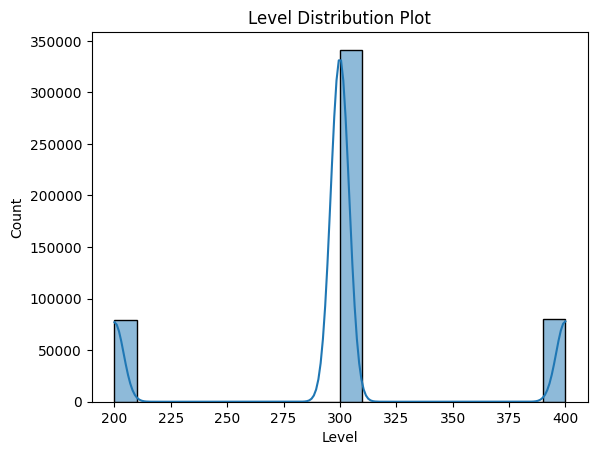

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(data=df, x='Level', kde=True)
plt.title('Level Distribution Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


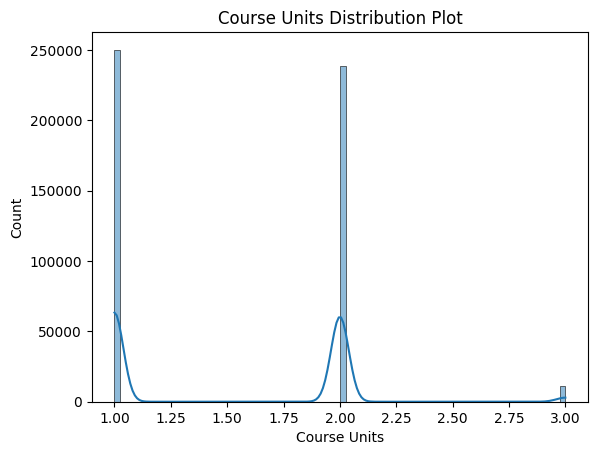

In [41]:
sns.histplot(data=df, x='Course Units', kde=True)
plt.title('Course Units Distribution Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


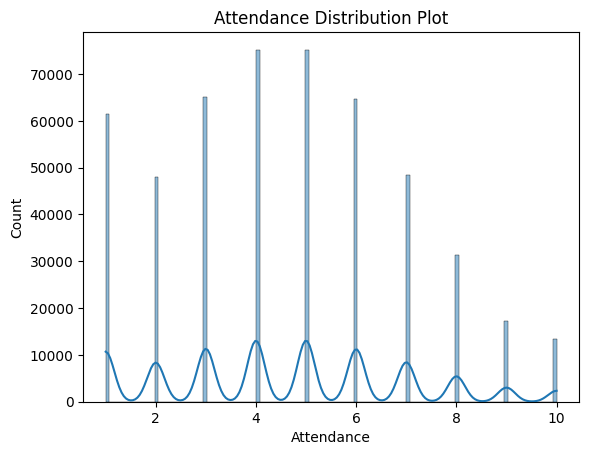

In [42]:
sns.histplot(data=df, x='Attendance', kde=True)
plt.title('Attendance Distribution Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


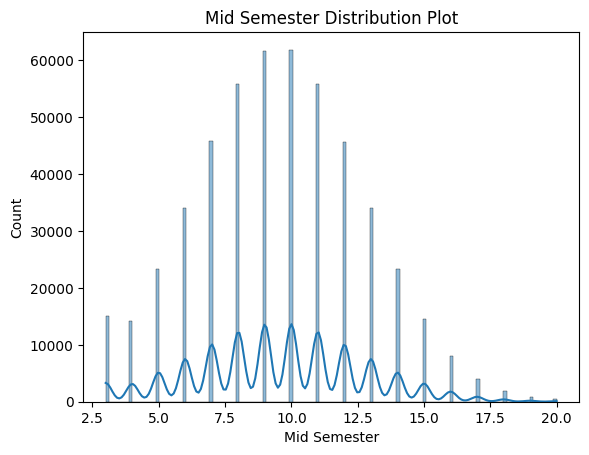

In [43]:
sns.histplot(data=df, x='Mid Semester', kde=True)
plt.title('Mid Semester Distribution Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


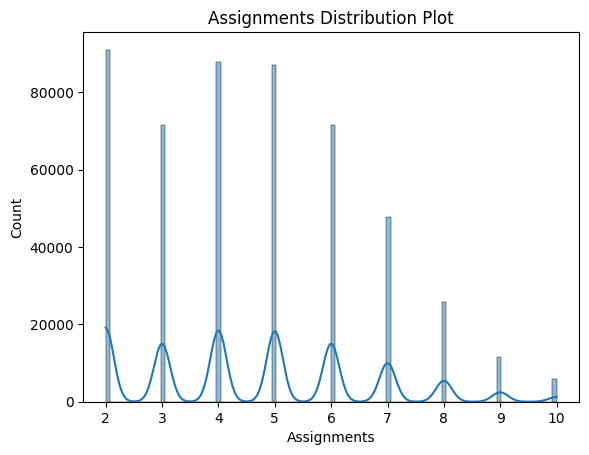

In [44]:
sns.histplot(data=df, x='Assignments', kde=True)
plt.title('Assignments Distribution Plot')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


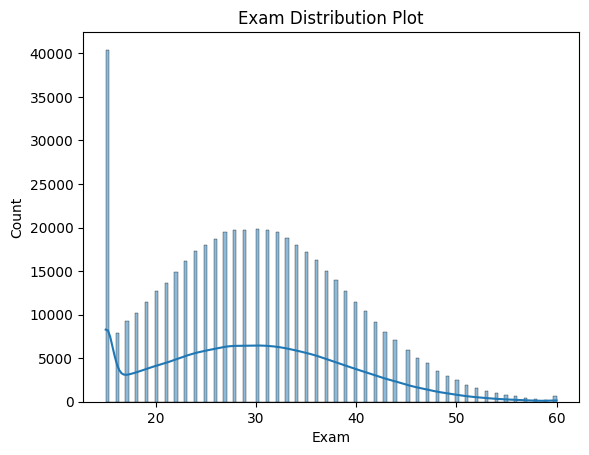

In [45]:
sns.histplot(data=df, x='Exam', kde=True)
plt.title('Exam Distribution Plot')
plt.show()

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score

# Assuming you have a DataFrame 'df' with relevant columns

# Separate features and target variables
X = df[['Level', 'Course Units', 'Attendance', 'Mid Semester', 'Assignments']]
y = df['Exam']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize models
models = [
    RandomForestRegressor(),
    GradientBoostingRegressor(),
    LinearRegression()
]

# Fit and evaluate models
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f"{model.__class__.__name__} Model")
    print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred):.2f}")
    print(f"R-squared: {r2_score(y_test, y_pred):.2f}")
    print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred):.2f}")
    print(f"Accuracy: {accuracy_score(y_test, [round(y) for y in y_pred]):.2f}")
    print()

RandomForestRegressor Model
Mean Squared Error: 25.97
R-squared: 0.70
Mean Absolute Error: 4.04
Accuracy: 0.08



In [ ]:
# # Predict 'Exam' scores
# rf_exam_pred = rf_model.predict(X_test)
# gb_exam_pred = gb_model.predict(X_test)
# lr_exam_pred = lr_model.predict(X_test)

# # Evaluate models for 'Exam' prediction
# rf_exam_mse = mean_squared_error(y_exam_test, rf_exam_pred)
# gb_exam_mse = mean_squared_error(y_exam_test, gb_exam_pred)
# lr_exam_mse = mean_squared_error(y_exam_test, lr_exam_pred)

# # Additional regression metrics
# rf_r2 = r2_score(y_exam_test, rf_exam_pred)
# gb_r2 = r2_score(y_exam_test, gb_exam_pred)
# lr_r2 = r2_score(y_exam_test, lr_exam_pred)

# rf_mae = mean_absolute_error(y_exam_test, rf_exam_pred)
# gb_mae = mean_absolute_error(y_exam_test, gb_exam_pred)
# lr_mae = mean_absolute_error(y_exam_test, lr_exam_pred)

# # Calculate accuracy as 1 - (MSE/variance)
# rf_accuracy = 1 - (rf_exam_mse / y_exam_test.var())
# gb_accuracy = 1 - (gb_exam_mse / y_exam_test.var())
# lr_accuracy = 1 - (lr_exam_mse / y_exam_test.var())

In [ ]:

# print("Random Forest Model - Exam MSE:", rf_exam_mse)
# print("Gradient Boosting Model - Exam MSE:", gb_exam_mse)
# print("Linear Regression Model - Exam MSE:", lr_exam_mse)

# print("Random Forest Model - R-squared:", rf_r2)
# print("Gradient Boosting Model - R-squared:", gb_r2)
# print("Linear Regression Model - R-squared:", lr_r2)

# print("Random Forest Model - MAE:", rf_mae)
# print("Gradient Boosting Model - MAE:", gb_mae)
# print("Linear Regression Model - MAE:", lr_mae)

# print("Random Forest Model - Accuracy:", rf_accuracy)
# print("Gradient Boosting Model - Accuracy:", gb_accuracy)
# print("Linear Regression Model - Accuracy:", lr_accuracy)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers


# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Define the neural network model
model = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=[X_train_scaled.shape[1]]),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

# Compile the model
model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

In [ ]:
model.summary()

In [ ]:
# Train the model
epochs = 10
batch_size = 32
history = model.fit(X_train_scaled, y_train, epochs=epochs, batch_size=batch_size, validation_split=0.2, verbose=1, shuffle=True)

# Evaluate the model on the test set
test_loss, test_mae = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test MAE: {test_mae:.4f}')

In [ ]:
# Split the data into features and target
X = df[['Level', 'Course Units', 'Attendance', 'Mid Semester', 'Assignments']]
y = df['Exam']

# Initialize models
rf_model = RandomForestRegressor()
gb_model = GradientBoostingRegressor()
lr_model = LinearRegression()

# Fit the models
rf_model.fit(X, y)
gb_model.fit(X, y)
lr_model.fit(X, y)

In [ ]:
def predict_exam_score(model, level, course_units, attendance, mid_semester, assignments):
    """
    Predict the 'Exam' score based on the input features using the specified model.

    Args:
        model (str): The model to use for prediction ('rf', 'gb', or 'lr').
        level (int): The level (200, 300, or 400).
        course_units (int): The number of course units (1, 2, or 3).
        attendance (int): The attendance score (1-10).
        mid_semester (int): The mid-semester score (3-20).
        assignments (int): The assignments score (2-10).

    Returns:
        float: The predicted 'Exam' score.
    """
    if model == 'rf':
        selected_model = rf_model
    elif model == 'gb':
        selected_model = gb_model
    elif model == 'lr':
        selected_model = lr_model
    else:
        raise ValueError("Invalid model specified. Choose 'rf', 'gb', or 'lr'.")

    input_data = pd.DataFrame({
        'Level': [level],
        'Course Units': [course_units],
        'Attendance': [attendance],
        'Mid Semester': [mid_semester],
        'Assignments': [assignments]
    })

    predicted_score = selected_model.predict(input_data)
    return predicted_score[0]

In [ ]:
# Example usage
level = 400
course_units = 3
attendance = 0
mid_semester = 10
assignments = 10

rf_prediction = predict_exam_score('rf', level, course_units, attendance, mid_semester, assignments)
print(f"Random Forest Prediction: {rf_prediction:.2f}")

gb_prediction = predict_exam_score('gb', level, course_units, attendance, mid_semester, assignments)
print(f"Gradient Boosting Prediction: {gb_prediction:.2f}")

lr_prediction = predict_exam_score('lr', level, course_units, attendance, mid_semester, assignments)
print(f"Linear Regression Prediction: {lr_prediction:.2f}")

In [ ]:
import pickle

with open('gb1_model.sav', 'wb') as file:
    pickle.dump(gb_model, file)

In [ ]:
import sklearn
print(sklearn.__version__)